<a href="https://colab.research.google.com/github/Ruchika-11/EVA-7/blob/main/Assignment_5/Session5colab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeleton Code with Less Parameters

### ***Target:***        
Get the basic skeleton right. Without introducing much changes, We will try to make the model lighter and not add any extra stuff.


### ***Results:***          
Parameters: 15,940      
Best Train Accuracy: 99.09%           
Best Test Accuracy: 98.82%           

### ***Analysis:***         
The model has some over-fitting but is much lighter now. Model can be pushed further to achieve the required accuracy.



In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Using Sequential to create a small model. When `self.convblock1` is run,
        # input will first be passed to `Conv2d(1,16,3)`. The output of
        # `Conv2d(1,16,3)` will be used as the input to the `ReLU`;

        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), stride=1, padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 26
        
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=1, padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 24

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 24

        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12
        
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 10

        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=1, padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 8

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 8

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 6

        self.convblock8 = nn.Sequential(
             nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(6, 6), padding=0, bias=False),
        ) # output_size = 1

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x)

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,608
              ReLU-4           [-1, 32, 24, 24]               0
            Conv2d-5           [-1, 10, 24, 24]             320
              ReLU-6           [-1, 10, 24, 24]               0
         MaxPool2d-7           [-1, 10, 12, 12]               0
            Conv2d-8           [-1, 16, 10, 10]           1,440
              ReLU-9           [-1, 16, 10, 10]               0
           Conv2d-10             [-1, 32, 8, 8]           4,608
             ReLU-11             [-1, 32, 8, 8]               0
           Conv2d-12             [-1, 10, 8, 8]             320
             ReLU-13             [-1, 10, 8, 8]               0
           Conv2d-14             [-1, 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [8]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
        # get samples
        data, target = data.to(device), target.to(device)

        # Init
        optimizer.zero_grad()
        
        # Predict
        y_pred = model(data)

        # Calculate loss
        loss = F.nll_loss(y_pred, target)
        train_losses.append(loss)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Update pbar-tqdm
        pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)

        pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
        train_acc.append(100*correct/processed)


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [10]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 16):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 1


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=0.2429618388414383 Batch_id=468 Accuracy=36.56: 100%|██████████| 469/469 [00:19<00:00, 23.88it/s]



Test set: Average loss: 0.2597, Accuracy: 9251/10000 (92.51%)

EPOCH: 2


Loss=0.12132066488265991 Batch_id=468 Accuracy=95.20: 100%|██████████| 469/469 [00:19<00:00, 24.17it/s]



Test set: Average loss: 0.0915, Accuracy: 9722/10000 (97.22%)

EPOCH: 3


Loss=0.03836115449666977 Batch_id=468 Accuracy=97.17: 100%|██████████| 469/469 [00:19<00:00, 23.99it/s]



Test set: Average loss: 0.0692, Accuracy: 9772/10000 (97.72%)

EPOCH: 4


Loss=0.020798632875084877 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:19<00:00, 24.08it/s]



Test set: Average loss: 0.0551, Accuracy: 9826/10000 (98.26%)

EPOCH: 5


Loss=0.046437766402959824 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:19<00:00, 24.08it/s]



Test set: Average loss: 0.0631, Accuracy: 9801/10000 (98.01%)

EPOCH: 6


Loss=0.0076402840204536915 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:19<00:00, 24.02it/s]



Test set: Average loss: 0.0469, Accuracy: 9842/10000 (98.42%)

EPOCH: 7


Loss=0.028237359598279 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:19<00:00, 23.83it/s]



Test set: Average loss: 0.0381, Accuracy: 9869/10000 (98.69%)

EPOCH: 8


Loss=0.06403885036706924 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:19<00:00, 24.10it/s]



Test set: Average loss: 0.0489, Accuracy: 9841/10000 (98.41%)

EPOCH: 9


Loss=0.06362637132406235 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:19<00:00, 23.66it/s]



Test set: Average loss: 0.0424, Accuracy: 9864/10000 (98.64%)

EPOCH: 10


Loss=0.002430851338431239 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:19<00:00, 23.60it/s]



Test set: Average loss: 0.0410, Accuracy: 9865/10000 (98.65%)

EPOCH: 11


Loss=0.051713574677705765 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:19<00:00, 23.64it/s]



Test set: Average loss: 0.0379, Accuracy: 9873/10000 (98.73%)

EPOCH: 12


Loss=0.057239845395088196 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:19<00:00, 23.71it/s]



Test set: Average loss: 0.0454, Accuracy: 9853/10000 (98.53%)

EPOCH: 13


Loss=0.11671378463506699 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:19<00:00, 23.99it/s]



Test set: Average loss: 0.0399, Accuracy: 9873/10000 (98.73%)

EPOCH: 14


Loss=0.0046148342080414295 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:19<00:00, 24.00it/s]



Test set: Average loss: 0.0362, Accuracy: 9882/10000 (98.82%)

EPOCH: 15


Loss=0.0014551280764862895 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:19<00:00, 24.25it/s]



Test set: Average loss: 0.0390, Accuracy: 9876/10000 (98.76%)



Text(0.5, 1.0, 'Test Accuracy')

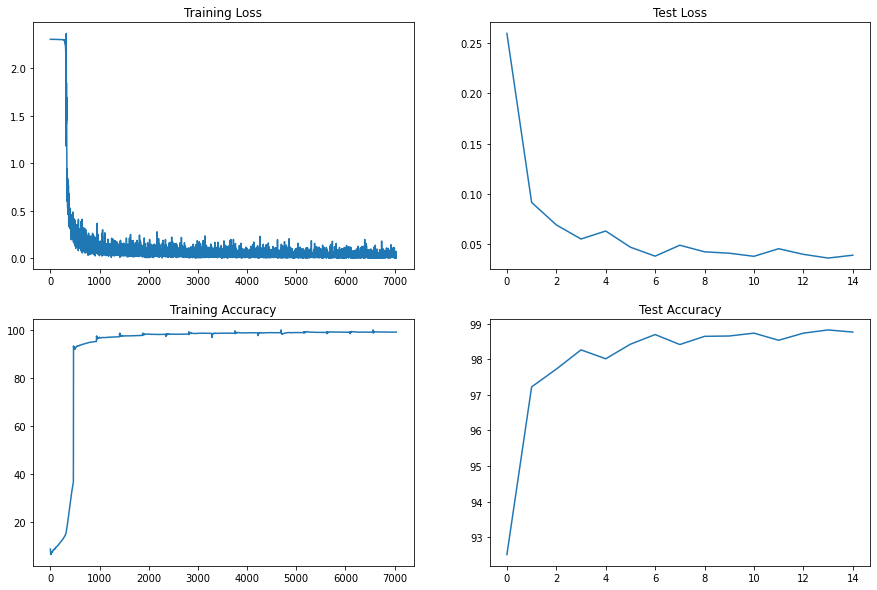

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")